In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import shutil
from collections import OrderedDict
import json
import numpy as np
import nibabel as nib
import SimpleITK as sitk

# Setup

In [2]:
base_dir = '/home/mzukovec/Documents/Faks/Semester 3/AMS'
respository_dir = os.path.join(base_dir,'nnUNet')
os.chdir(base_dir)

# Data Folder Structure

In [3]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input: 
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder 
    """
    if os.path.exists(folder_path):
        
        if not overwrite:
            print(f'{folder_path} exists.')
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

In [4]:
task_name = 'Task101_BRGR1' #Initial task
nnunet_dir = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_dir,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
main_dir = os.path.join(base_dir,'nnUNet/nnunet')

make_if_dont_exist(task_folder_name,overwrite = False)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir,overwrite= False)
make_if_dont_exist(os.path.join(main_dir,'nnunet_trained_models'))

nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1 created!
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/imagesTr created!
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/labelsTr created!
nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/imagesTs created!
/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnunet_trained_models created!


# Environment Variables

In [5]:
os.environ['nnUNet_raw_data_base'] = os.path.join(main_dir,'nnUNet_raw_data_base')
os.environ['nnUNet_preprocessed'] = os.path.join(main_dir,'preprocessed')
os.environ['RESULTS_FOLDER'] = os.path.join(main_dir,'nnUNet_trained_models')

# Dataset Verification

In [6]:
#running it from the experiment_planning folder to verify the path settings
os.chdir(main_dir)
!python3 experiment_planning/nnUNet_plan_and_preprocess.py -t 101 --verify_dataset_integrity
os.chdir(base_dir)


Please cite the following paper when using nnUNet:
Fabian Isensee, Paul F. Jäger, Simon A. A. Kohl, Jens Petersen, Klaus H. Maier-Hein "Automated Design of Deep Learning Methods for Biomedical Image Segmentation" arXiv preprint arXiv:1904.08128 (2020).
If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case BRGR1_001
checking case BRGR1_002
checking case BRGR1_003
checking case BRGR1_004
checking case BRGR1_005
checking case BRGR1_006
checking case BRGR1_007
checking case BRGR1_008
checking case BRGR1_009
checking case BRGR1_010
checking case BRGR1_011
checking case BRGR1_012
checking case BRGR1_013
checking case BRGR1_014
checking case BRGR1_015
checking case BRGR1_016
checking case BRGR1_017
checking case BRGR1_018
checking case BRGR1_019
checking case BRGR1_020
checking case BRGR1_021
checking case BRGR1_022
checking case BRGR1_023
checking case BRGR1_024
checking case BRGR1_025
checking case BRGR1




 Task101_BRGR1
number of threads:  (8, 8) 

using nonzero mask for normalization
Are we using the nonzero mask for normalizaion? OrderedDict([(0, True)])
the median shape of the dataset is  [  1. 166. 143.]
the max shape in the dataset is  [  1. 209. 174.]
the min shape in the dataset is  [  1. 102.  81.]
we don't want feature maps smaller than  4  in the bottleneck
the transposed median shape of the dataset is  [  1. 166. 143.]
generating configuration for 3d_fullres
{0: {'batch_size': 14, 'num_pool_per_axis': [0, 1, 1], 'patch_size': array([  1, 166, 144]), 'median_patient_size_in_voxels': array([  1, 166, 143]), 'current_spacing': array([1., 1., 1.]), 'original_spacing': array([1., 1., 1.]), 'do_dummy_2D_data_aug': True, 'pool_op_kernel_sizes': [[1, 2, 2]], 'conv_kernel_sizes': [[3, 3, 3], [3, 3, 3]]}}
transpose forward [0, 1, 2]
transpose backward [0, 1, 2]
Initializing to run preprocessing
npz folder: /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_raw_data_ba

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 166, 148)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 166, 148)} 

1 5008
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_066.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 164, 135)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 164, 135)} 

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 129, 103)} 
after: no resampling necessary
no resampling necessary
 {'spacing': array([1., 1., 1.]), 'data.shape (data 

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 121, 96)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 121, 96)} 

1 6610
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_015.npz
1 4162
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_027.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 172, 149)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 172, 149)} 

1 4955
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_073.npz
no re

no resampling necessary
no resampling necessary
1 2838
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_097.npz
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 143, 112)} 
after: 1 4447
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_129.npz
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 143, 112)} 

1 4969
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_077.npz
no resampling necessary
no resampling necessary
1 3521
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_137.npz
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.s

1 7808
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_155.npz
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 182, 162)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 182, 162)} 

1 7880
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_117.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 139, 125)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 139, 125)} 

1 4700
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_164.npz
no resampling necessary
no resampling necessary
bef

1 7185
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_193.npz
1 5744
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_176.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 182, 154)} 
after: no resampling necessary
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 182, 154)} 

no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 209, 174)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 209, 174)} 

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (dat

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 140, 124)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 140, 124)} 

no resampling necessary
no resampling necessary
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 177, 152)} 
after: before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 196, 171)} 
after: no resampling necessary
no resampling necessary
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 177, 152)} 

 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 196, 171)} 

before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is tran

no resampling necessary
no resampling necessary
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 203, 174)} 
after: before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 167, 143)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 167, 143)} 

 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 203, 174)} 

1 4682
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_248.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 168, 149)} 
after: 1 10000
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRG

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 150, 122)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 150, 122)} 

1 4000
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_stage0/BRGR1_261.npz
using nonzero mask for normalization
Are we using the nonzero maks for normalizaion? OrderedDict([(0, True)])
the median shape of the dataset is  [  1. 166. 143.]
the max shape in the dataset is  [  1. 209. 174.]
the min shape in the dataset is  [  1. 102.  81.]
we don't want feature maps smaller than  4  in the bottleneck
the transposed median shape of the dataset is  [  1. 166. 143.]
[{'batch_size': 11, 'num_pool_per_axis': [5, 5], 'patch_size': array([192, 160]), 'median_patient_size_in_voxels': array([  1, 166, 143]), 'current_spacing': array([1., 1., 1.]), 'origi

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 203, 165)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 203, 165)} 

normalization...
1 6792
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_060.npz
no resampling necessary
no resampling necessary
no resampling necessary
normalization done
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 129, 103)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 129, 103)} 

normalization...
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 132, 101)} 
after: normalization done
 {'spacing': array([1., 1

normalization...
normalization done
1 3348
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_104.npz
no resampling necessary
1 2656
no resampling necessary
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_095.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 110, 89)} 
after: no resampling necessary
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 110, 89)} 

normalization...
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 179, 146)} 
after: no resampling necessary
no resampling necessary
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 179, 146

1 2210
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_089.npz
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_146.npz
1 4517
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_132.npz
normalization done
no resampling necessary
no resampling necessary
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 182, 162)} 
after: before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 139, 125)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 182, 162)} 

 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1

saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_202.npz
1 7185
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_193.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 163, 139)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 163, 139)} 

normalization...
no resampling necessary
normalization done
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 186, 158)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 186, 158)} 

normalization...
1 5744
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 202, 170)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 202, 170)} 

normalization...
normalization done
1 7919
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_207.npz
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 170, 146)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 170, 146)} 

normalization...
normalization done
no resampling necessary
no resampling necessary
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1,

before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 199, 154)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 199, 154)} 

normalization...
normalization done
1 8081
saving:  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/preprocessed/Task101_BRGR1/nnUNetData_plans_v2.1_2D_stage0/BRGR1_267.npz
no resampling necessary
no resampling necessary
no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 203, 174)} 
after: before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (1, 1, 168, 149)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 203, 174)} 

normalization...
 {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (1, 1, 168, 149)} 

norm

In [7]:
os.chdir(main_dir)
!nnUNet_train 2d nnUNetTrainerV2 101 0 
os.chdir(base_dir)


Please cite the following paper when using nnUNet:
Fabian Isensee, Paul F. Jäger, Simon A. A. Kohl, Jens Petersen, Klaus H. Maier-Hein "Automated Design of Deep Learning Methods for Biomedical Image Segmentation" arXiv preprint arXiv:1904.08128 (2020).
If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  1
modalities:  {0: 'MRI'}
use_mask_for_norm OrderedDict([(0, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT')])
stages...

stage:  0
{'batch_size': 11, 'num_pool_per_axis': [5, 5], 'patch_size': array([192, 160]), 'median_patient_size_in_voxels': array([  1, 166, 143]), 'current_spacing': array([1.

2020-11-24 12:12:00.356901: train loss : -0.4273
2020-11-24 12:12:02.984953: validation loss: -0.6616
2020-11-24 12:12:02.985271: Average global foreground Dice: [0.8417973391404374]
2020-11-24 12:12:02.985322: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2020-11-24 12:12:03.299071: lr: 0.009991
2020-11-24 12:12:03.299206: This epoch took 41.639719 s

2020-11-24 12:12:03.299251: 
epoch:  1
2020-11-24 12:12:40.855994: train loss : -0.6883
2020-11-24 12:12:43.557353: validation loss: -0.7154
2020-11-24 12:12:43.557669: Average global foreground Dice: [0.8647717911203356]
2020-11-24 12:12:43.557717: (interpret this as an estimate for the Dice of the different classes. This is not exact.)
2020-11-24 12:12:43.929442: lr: 0.009982
2020-11-24 12:12:43.952988: saving checkpoint...
2020-11-24 12:12:44.151056: done, saving took 0.22 seconds
2020-11-24 12:12:44.155622: This epoch took 40.856333 s

2020-11-24 12:12:44.155673: 
epoch:  2
2020-11-24 12:13

In [6]:
#location where you want save your results, will be created if dont exist
os.chdir(os.path.join(main_dir,'nnUNet_trained_models', 'nnUNet', '2d', task_name, 'nnUNetTrainerV2__nnUNetPlansv2.1', 'fold_0'))
!mv model_best.model model_final_checkpoint.model
!mv model_best.model.pkl model_final_checkpoint.model.pkl
os.chdir(main_dir)
!nnUNet_predict -i nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/imagesTs -o nnUNet_Prediction_Results/Task101_BRGR1 -t 101 -tr nnUNetTrainerV2 -m 2d --num_threads_preprocessing 1 --save_npz
os.chdir(base_dir)

mv: cannot stat 'model_best.model': No such file or directory
mv: cannot stat 'model_best.model.pkl': No such file or directory

Please cite the following paper when using nnUNet:
Fabian Isensee, Paul F. Jäger, Simon A. A. Kohl, Jens Petersen, Klaus H. Maier-Hein "Automated Design of Deep Learning Methods for Biomedical Image Segmentation" arXiv preprint arXiv:1904.08128 (2020).
If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/Task101_BRGR1/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 1 input modalities for each image
Found 2 unique case ids, here are some examples: ['BRGR1_002' 'BRGR1_002']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 2
number of cases that still need to be predicted: 2
emptying cuda cache
loading parameters for folds, N

# Results

In [7]:
os.chdir('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/imagesTs')
tmp = sitk.ReadImage('BRGR1_001_0000.nii.gz')
tmp = sitk.GetArrayFromImage(tmp)
if len(tmp.shape) < 3:
    tmp = tmp.reshape((1, tmp.shape[0], tmp.shape[1]))
    tmp = sitk.GetImageFromArray(tmp)
    sitk.WriteImage(tmp, 'BRGR1_001_0000.nii.gz')

<IPython.core.display.Javascript object>


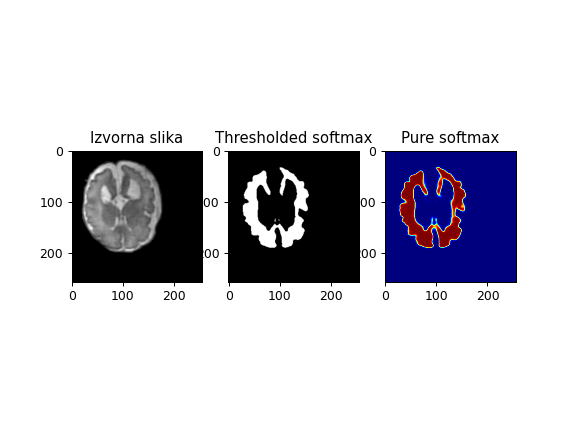

In [9]:
src = sitk.ReadImage('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task101_BRGR1/imagesTs/BRGR1_001_0000.nii.gz')
seg = sitk.ReadImage('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task101_BRGR1/BRGR1_001.nii.gz')
data = np.load('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task101_BRGR1/BRGR1_001.npz')
data = data['softmax'][0]
plt.figure()
plt.subplot(1,3,1)
plt.title('Izvorna slika')
plt.imshow(sitk.GetArrayFromImage(src).squeeze(), cmap='gray')
plt.subplot(1,3,2)
plt.title('Thresholded softmax')
plt.imshow(sitk.GetArrayFromImage(seg).squeeze(), cmap='gray')
plt.subplot(1,3,3)
plt.title('Pure softmax')
plt.imshow(np.array(data, dtype=np.float32)[:,:], cmap='jet')
plt.show()

In [23]:
data = np.load('/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task101_BRGR1/BRGR1_002.npz')
data = data['softmax'][0]
data = np.asarray(data, dtype=np.float32)
data = np.rot90(data, 2)
data = sitk.GetImageFromArray(data)
data.SetOrigin((-255, -255, 0))
sitk.WriteImage(data, '/home/mzukovec/Documents/Faks/Semester 3/AMS/nnUNet/nnunet/nnUNet_Prediction_Results/Task101_BRGR1/BRGR1_002.nii.gz')

(256, 256)